In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy import stats, integrate

In [137]:
#Load data into dataframes
#load train data
train_answer = pd.read_csv("data/train.answer", sep="\r", header=None )
train_context = pd.read_csv("data/train.context", sep="\r", header=None )
train_question = pd.read_csv("data/train.question", sep="\r", header=None )
train_span = pd.read_csv("data/train.span", sep="\r", header=None )

#load dev data
dev_answer = pd.read_csv("data/dev.answer", sep="\r", header=None )
dev_context = pd.read_csv("data/dev.context", sep="\r", header=None )
dev_question = pd.read_csv("data/dev.question", sep="\r", header=None )
dev_span = pd.read_csv("data/dev.span", sep="\r", header=None )

#add number of tokens to train dataframes
train_answer[1] = [len(str(train_answer[0][i]).split()) for i in range(len(train_answer))]
train_context[1] = [len(str(train_context[0][i]).split()) for i in range(len(train_context))]
train_question[1] = [len(str(train_question[0][i]).split()) for i in range(len(train_question))]

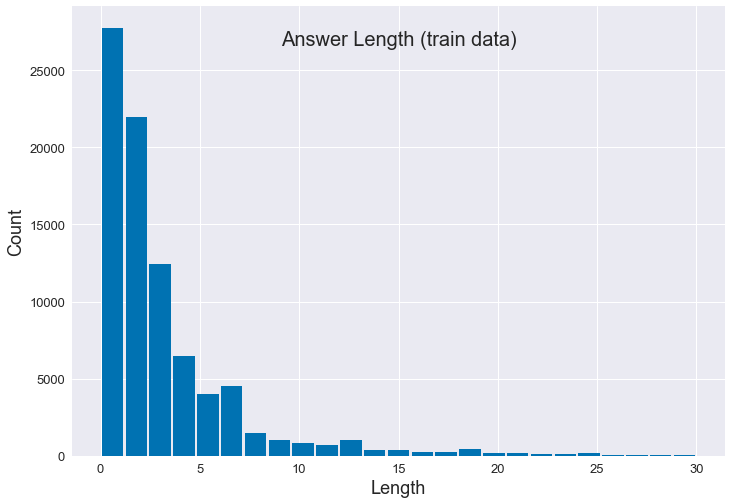

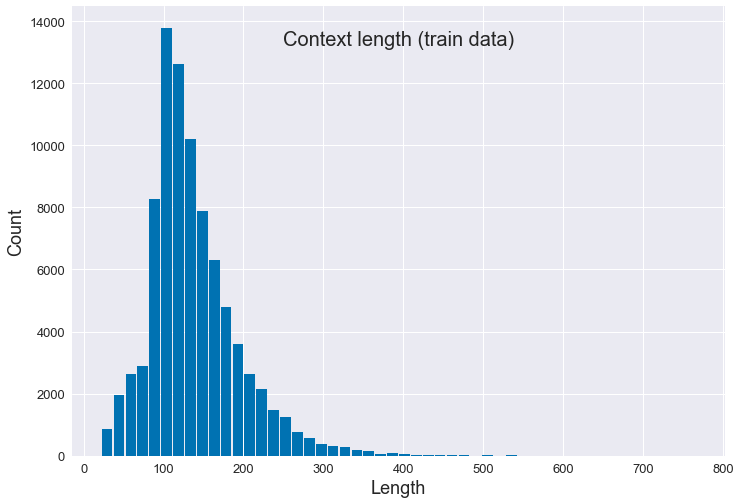

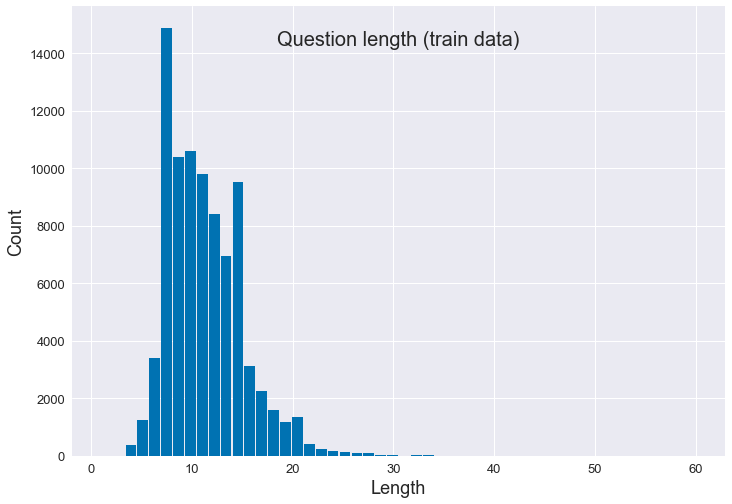

In [144]:
sns.set(rc={"figure.figsize": (6, 6)})
np.random.seed(sum(map(ord, "palettes")))
#sns.set(style="seaborn-colorblind")
plt.style.use('seaborn-colorblind')

plot_size = (11.7, 8.27)

SMALL_SIZE = 13
MEDIUM_SIZE = 18
BIGGER_SIZE = 20


# histogram plot of the lengths (in tokens) of the context, question, and answer in the training data

#histogram Train_answer
fig = plt.figure(figsize=plot_size)
plt.rc('axes', titlesize=MEDIUM_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)         
plt.ylabel('Count')
plt.xlabel('Length')
plt.title('Answer Length (train data)', fontsize=BIGGER_SIZE, y=0.90)
plt.hist(train_answer[1], bins=25, range=(0,30), rwidth=0.9)
plt.show()
fig.savefig('Answer length (train data).jpg')

#histogram Train_context
fig = plt.figure(figsize=plot_size)
plt.rc('axes', titlesize=MEDIUM_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)         
plt.ylabel('Count')
plt.xlabel('Length')
plt.title('Context length (train data)', fontsize=BIGGER_SIZE, y=0.90)
plt.hist(train_context[1], bins=50, rwidth=0.9)
plt.show()
fig.savefig('Context Length (train data).jpg')


#histogram Train_question
fig = plt.figure(figsize=plot_size)
plt.rc('axes', titlesize=MEDIUM_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)         
plt.ylabel('Count')
plt.xlabel('Length')
plt.title('Question length (train data)', fontsize=BIGGER_SIZE, y=0.90)
plt.hist(train_question[1], bins=50, rwidth=0.9)
plt.show()
fig.savefig('Question Length (train data).jpg')

In [139]:
# Collect statistics about where in the context the answer appears
#########
# imagine the length of the context is 1, then train_answer_context_position 
# is a number between 0 and 1 representing the ratio between total words in context and position of answer
# e.g. a train_answer_context_position of 0.5 represents a position of "in exactly the middle of the context"
#########
train_answer_context_position = {}
i = 0
for i in range(len(train_context)):
    if train_span[0][i].split()[0] != "0":
        train_answer_context_position[i] = int(len(train_context[0][i].split())) / int(train_span[0][i].split()[0])
    else:
        train_answer_context_position[i] = 0

df_train_answer_context_position = pd.DataFrame(train_answer_context_position.items()).drop(columns=0)


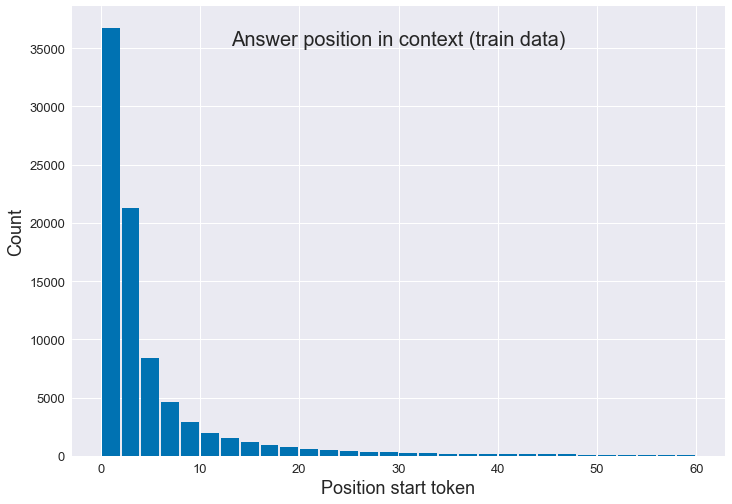

In [148]:
# Histogram of train_answer_context_position
fig = plt.figure(figsize=plot_size)
plt.rc('axes', titlesize=MEDIUM_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)         
plt.ylabel('Count')
plt.xlabel('Position start token')
plt.title('Answer position in context (train data)', fontsize=BIGGER_SIZE, y=0.90)
plt.hist(df_train_answer_context_position[1], bins=30, range=(0,60), rwidth=0.9)
plt.show()
fig.savefig('Answer position in context (train data).jpg')


Answers are more likely to appear at the beginning of the context

In [141]:
train_question.head()

,0,1
0,the common bit rate on the internet is 128 kbi...,15
1,what is the main function of the epidermis ?,9
2,what is the term to describe the differences b...,13
3,what award did gilbert refuse in 1998 ?,8
4,which film featured destiny 's child 's first ...,11


In [142]:
histinput = {}
histinput["what"] = train_question[train_question[0].apply(lambda x: 'what' in x)][0].count()
histinput["how"] = train_question[train_question[0].apply(lambda x: 'how' in x)][0].count()
histinput["who"] = train_question[train_question[0].apply(lambda x: 'who' in x)][0].count()
histinput["when"] = train_question[train_question[0].apply(lambda x: 'when' in x)][0].count()
histinput["which"] = train_question[train_question[0].apply(lambda x: 'which' in x)][0].count()
histinput["where"] = train_question[train_question[0].apply(lambda x: 'where' in x)][0].count()
histinput["why"] = train_question[train_question[0].apply(lambda x: 'why' in x)][0].count()

print histinput

{'what': 50195, 'who': 9819, 'when': 6597, 'how': 10015, 'which': 6376, 'where': 3889, 'why': 1230}


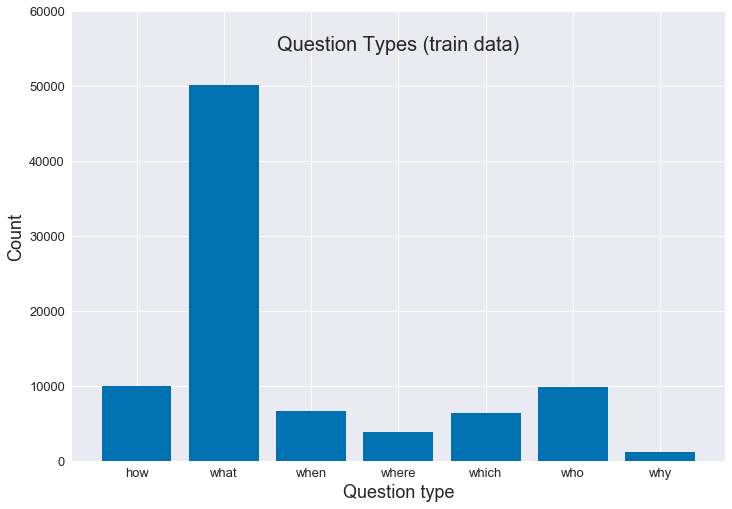

In [149]:
fig = plt.figure(figsize=plot_size)
plt.rc('axes', titlesize=MEDIUM_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)         
plt.ylabel('Count')
plt.xlabel('Question type')
plt.title('Question Types (train data)', fontsize=BIGGER_SIZE, y=0.90)
plt.ylim(ymax=60000)
plt.bar(histinput.keys(), histinput.values())
plt.show()
fig.savefig('Question Types (train data).jpg')